In [1]:
import os, sys
sys.path.append(os.path.join(os.getcwd(), ".."))
main_dir = os.path.abspath('..')
os.chdir(main_dir)
sys.path.append(main_dir)

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from PhysicsRegression import PhyReg

### Step1: load solar Differential Rotation data

The solar Differential Rotation data contains 34 datapoints, we use 28 of them to train.

In [2]:
x_to_fit = []
y_to_fit = []

df = pd.read_csv("./data/physics_data/solarDifferentialRotation.csv")
latitude = np.array(list(df["Latitude"])) / 180 * np.pi + np.pi / 2
speed = np.array(list(df["Two-day_Lag_mean"]))

x_to_fit.append(latitude.reshape((-1, 1)))
y_to_fit.append(speed.reshape((-1, 1)))

x_train, x_test, y_train, y_test = train_test_split(x_to_fit[0], y_to_fit[0], test_size=0.2, random_state=0)
x_to_fit.pop(0)
y_to_fit.pop(0)
for num_xypair in range(3, 28):
    x_to_fit.append(x_train[:num_xypair])
    y_to_fit.append(y_train[:num_xypair])

### Step2: inference with PhyReg

In [3]:
np.random.seed(2024)

phyreg = PhyReg(
    path = "./model.pt",
    max_len=1000,
)

phyreg.fit(
    x_to_fit[-1:], y_to_fit[-1:], 
    use_Divide=True, 
    use_MCTS=False, 
    use_GP=False, 
    use_pysr_init=True, 
    use_const_optimization=False,
    verbose=True,
    oracle_name="physical3",
    oracle_file="./physical/data/oracle_model_case3/",
    oracle_bs=4, oracle_lr=0.0002, oracle_epoch=100,
    use_seperate_type=["id"],
    save_oracle_model=True
)

Training oracle Newral Network...
Generating formula through End-to-End...
Finished forward in 2.1282198429107666 secs
Removed 1/2 skeleton duplicata
Removed 1/2 skeleton duplicata
Back aggregating formulas...
idx : 0
expr: (-0.18152263449052095 + (0.9411572573526638 * ((1.172645068243361 * sin(x_0)) + 2.112878603788687)))
mse : 0.0008033028493785676



In [4]:
np.random.seed(2024)

phyreg.express_skeleton(phyreg.best_gens, use_sp=True)
phyreg.express_best_gens(phyreg.best_gens, use_sp=True)

idx          : 0
expr skeleton: C_0*sin(x_0) + C_1
constants    : 1.104 1.807

idx : 0
expr: 1.10364341627605*sin(x_0) + 1.80702839737037
mse : 0.0008033028493785676



### Step3: plot the predicted formula

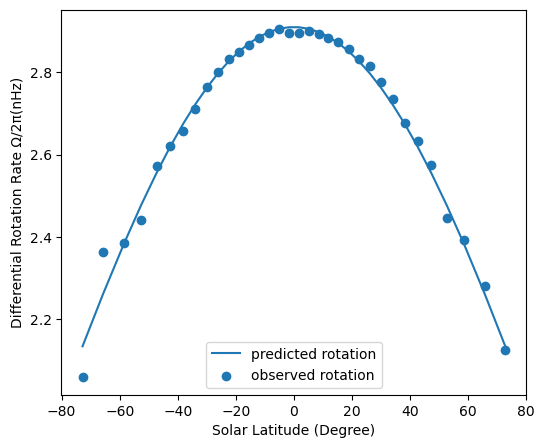

In [5]:
import matplotlib.pyplot as plt
from numpy import sin, cos

pred_speed = 1.10364341627605*sin(latitude) + 1.80702839737037

latitude_degree = latitude / np.pi * 180 - 90

plt.figure(figsize=(6, 5))
plt.plot(latitude_degree, pred_speed, label="predicted rotation")
plt.scatter(latitude_degree, speed, label="observed rotation")

plt.xlabel("Solar Latitude (Degree)")
plt.ylabel("Differential Rotation Rate Ω/2π(nHz)")
plt.legend()
plt.show()